In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sbn

In [2]:
folder = 'ML-data-Central-Europe-gridded'

In [3]:
path = "O:/Climate-and-Energy-Policy/CERM/Projects/Wildfire/Data/" + folder +  "/"

In [4]:
fire_season = True

if fire_season == True:
    # months to remove
    months = [1, 2, 3, 4, 5, 11, 12]
    season_name = 'fire-season'
else: 
    # months to remove
    months = [6, 7, 8, 9, 10]
    season_name = 'out-of-season'

In [5]:
dataset = pd.read_csv(path + '/df_all_' + season_name +'.csv')

In [6]:
dataset

,id,date,ignit,mean_elev,north,east,south,west,slope30,road_den,...,shrubland,grassland,other,temp,temp_mean_7day,wind,rhum,prcp,prcp_sum_7day,prcp_sum_28day
0,3198.0,2016-09-13,1,62.071857,0.405813,0.105250,0.347762,0.141175,0.000013,1926.000000,...,0.290800,0.045400,0.028500,30.080353,25.287497,11.834545,46.936417,0.000002,0.000331,0.249933
1,3198.0,2018-09-17,1,62.071857,0.405813,0.105250,0.347762,0.141175,0.000013,1926.000000,...,0.290800,0.045400,0.028500,23.805054,20.483425,8.637403,43.126170,0.000000,0.006399,0.460110
2,3365.0,2019-07-30,1,79.004539,0.381919,0.111675,0.370962,0.135444,0.000106,1807.000000,...,0.217900,0.009100,0.013100,25.522370,28.786146,14.535752,46.038418,0.000001,0.030568,0.273808
3,3859.0,2022-08-31,1,31.601013,0.377481,0.127556,0.348756,0.146206,0.000000,1506.000000,...,0.002600,0.065800,0.180500,21.569977,23.155191,16.873781,56.378426,0.000392,0.000924,0.240471
4,4014.0,2018-07-15,1,28.120051,0.408975,0.116569,0.357025,0.117431,0.000000,1203.000000,...,0.279300,0.063000,0.003000,25.449127,22.238329,8.360366,36.902447,0.000002,0.002489,0.092618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11271,6543.0,2022-07-24,0,114.303181,0.383183,0.143425,0.323636,0.149761,0.000180,2859.923089,...,0.011303,0.073058,0.035039,29.175934,29.677713,3.427331,39.860860,0.000537,0.015666,0.344810
11272,15697.0,2019-07-23,0,463.010280,0.434444,0.130950,0.328050,0.106556,0.091744,852.446647,...,0.000000,0.180600,0.000000,28.402252,25.300201,5.958509,41.162640,0.006697,0.019545,0.941452
11273,15680.0,2020-08-05,0,306.004903,0.470794,0.132175,0.277175,0.119856,0.002794,2197.943859,...,0.000000,0.024500,0.000500,17.164703,23.009988,8.141712,77.010185,0.024511,0.073499,0.699566
11274,18599.0,2021-08-11,0,-2.004469,0.399356,0.135756,0.325831,0.139056,0.000000,492.000000,...,0.000000,0.009500,0.032400,19.884430,21.196093,14.273962,70.823380,0.009971,0.040122,0.413073


In [7]:
year = []
month = []
for i, row in dataset.iterrows():
    year.append(int(row.date[:4]))
    month.append(int(row.date[5:7]))

In [8]:
dataset['year'] = year
dataset['month'] = month

In [9]:
ignit = dataset[dataset.ignit == 1]
no_ignit = dataset[dataset.ignit == 0]

In [10]:
#dataset['agri'] = dataset.agri + dataset.agriNA
#dataset = dataset.drop(columns = 'agriNA')

<Axes: xlabel='year', ylabel='Count'>

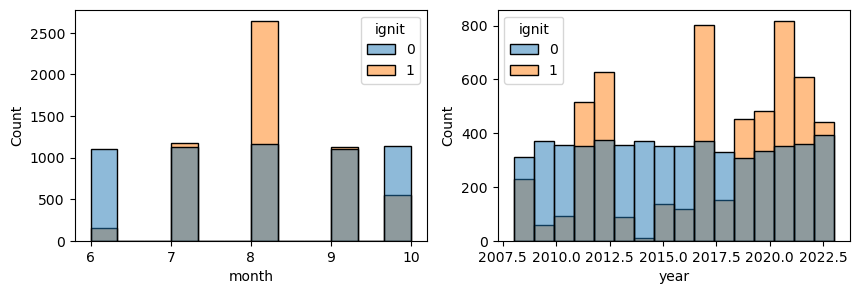

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3))

sbn.histplot(dataset, x = 'month', hue = 'ignit', bins = 12, ax = ax[0])
sbn.histplot(dataset, x = 'year', hue = 'ignit', ax = ax[1], bins = len(np.unique(year)))


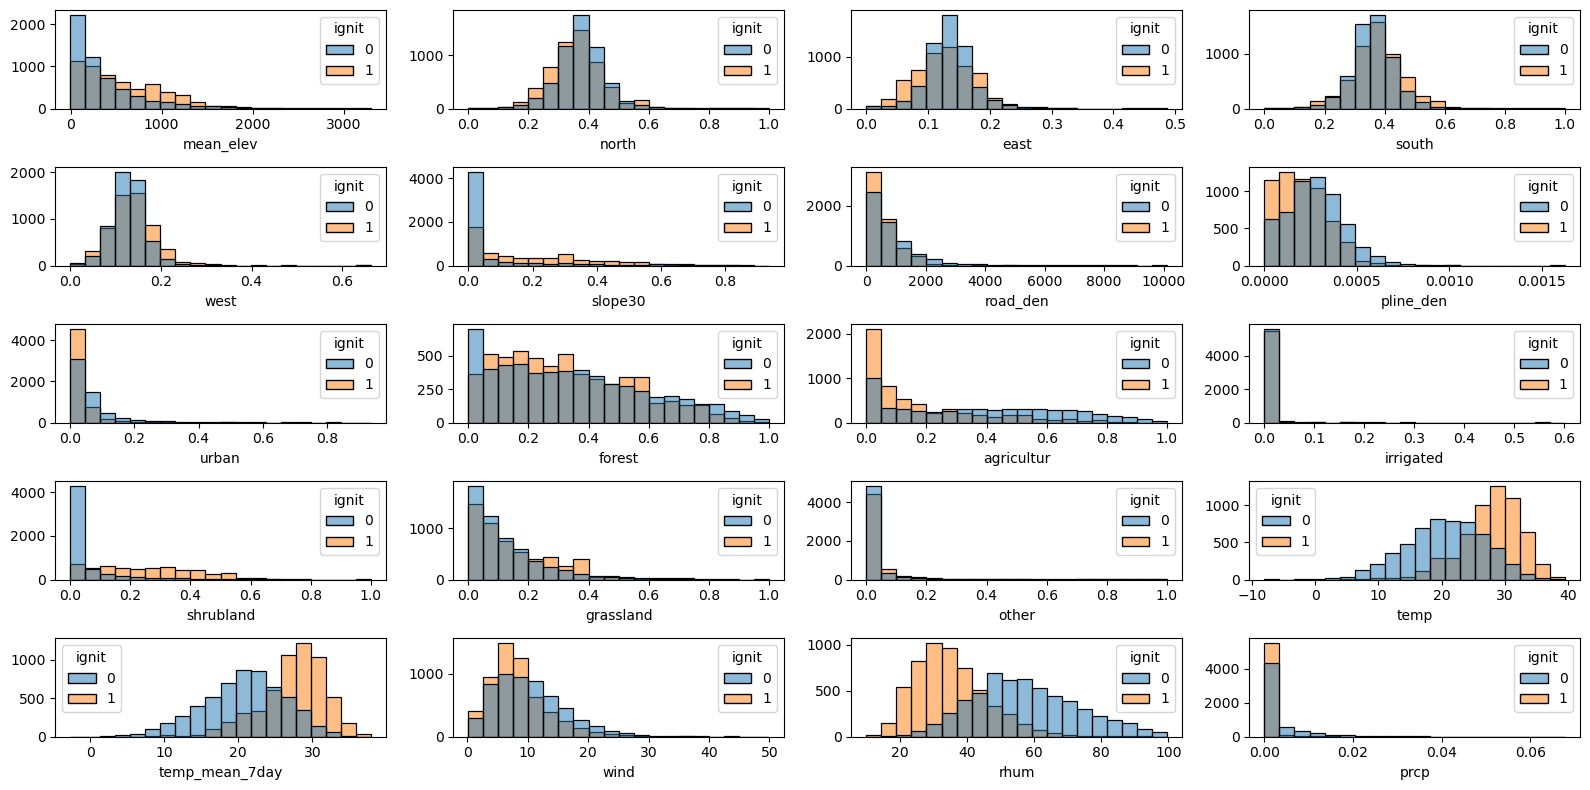

In [12]:
fig, ax = plt.subplots(5, 4, figsize = (16, 8))


for i, ax in enumerate(fig.axes):
    sbn.histplot(dataset, x = dataset.columns[3 + i], hue = 'ignit',  ax = ax, bins = 20)
    ax.set_xlabel(dataset.columns[3 + i], fontweight = 40)
    ax.set_ylabel('')


plt.tight_layout()

In [13]:
df = gpd.read_file(path + '/grid/europe_10km_grid.shp')
df['centre'] = df.centroid.to_crs(4326)
df['lat'] = ''
df['lon'] = ''

In [14]:
for i, row in df.iterrows():
    df.loc[i, 'lat'] = row.centre.coords.xy[1][0]
    df.loc[i, 'lon'] = row.centre.coords.xy[0][0]

In [15]:
df_subset = df[['id', 'lat', 'lon']]

In [16]:
dataset = dataset.set_index('id').join(df_subset.set_index('id'))

In [17]:
dataset

,date,ignit,mean_elev,north,east,south,west,slope30,road_den,pline_den,...,temp_mean_7day,wind,rhum,prcp,prcp_sum_7day,prcp_sum_28day,year,month,lat,lon
id,,,,,,,,,,,,,,,,,,,,,
3198.0,2016-09-13,1,62.071857,0.405813,0.105250,0.347762,0.141175,0.000013,1926.000000,0.000321,...,25.287497,11.834545,46.936417,0.000002,0.000331,0.249933,2016,9,51.10599,5.338772
3198.0,2018-09-17,1,62.071857,0.405813,0.105250,0.347762,0.141175,0.000013,1926.000000,0.000321,...,20.483425,8.637403,43.126170,0.000000,0.006399,0.460110,2018,9,51.10599,5.338772
3365.0,2019-07-30,1,79.004539,0.381919,0.111675,0.370962,0.135444,0.000106,1807.000000,0.000431,...,28.786146,14.535752,46.038418,0.000001,0.030568,0.273808,2019,7,51.021938,5.490084
3859.0,2022-08-31,1,31.601013,0.377481,0.127556,0.348756,0.146206,0.000000,1506.000000,0.000292,...,23.155191,16.873781,56.378426,0.000392,0.000924,0.240471,2022,8,51.396667,5.885124
4014.0,2018-07-15,1,28.120051,0.408975,0.116569,0.357025,0.117431,0.000000,1203.000000,0.000099,...,22.238329,8.360366,36.902447,0.000002,0.002489,0.092618,2018,7,52.388538,5.940582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543.0,2022-07-24,0,114.303181,0.383183,0.143425,0.323636,0.149761,0.000180,2859.923089,0.000550,...,29.677713,3.427331,39.860860,0.000537,0.015666,0.344810,2022,7,48.937624,8.279266
15697.0,2019-07-23,0,463.010280,0.434444,0.130950,0.328050,0.106556,0.091744,852.446647,0.000235,...,25.300201,5.958509,41.162640,0.006697,0.019545,0.941452,2019,7,46.649514,15.536368
15680.0,2020-08-05,0,306.004903,0.470794,0.132175,0.277175,0.119856,0.002794,2197.943859,0.000522,...,23.009988,8.141712,77.010185,0.024511,0.073499,0.699566,2020,8,48.174643,15.701886


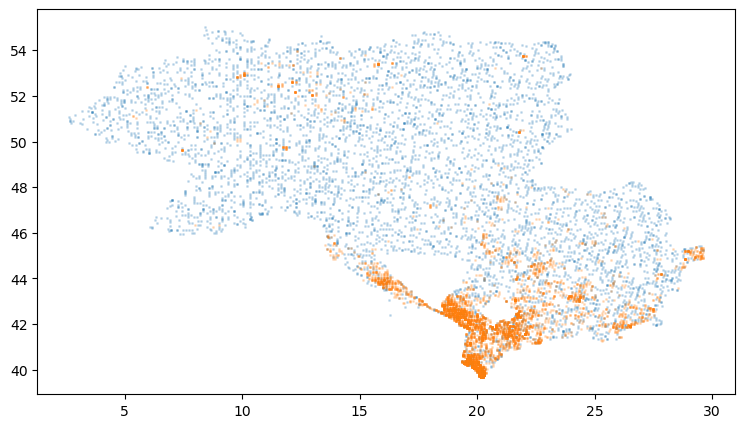

In [18]:
fig, ax = plt.subplots(figsize = (9, 5))
ax.plot(dataset[dataset.ignit == 0].lon, dataset[dataset.ignit == 0].lat, 's', alpha = 0.2, c = 'tab:blue', ms = 1)
ax.plot(dataset[dataset.ignit == 1].lon, dataset[dataset.ignit == 1].lat, 's', alpha = 0.2, c = 'tab:orange', ms = 1)

#### Include direction rather than north / east / south / west

In [19]:
#dataset.iloc[:, 8:12].idxmax(axis = 1).hist()

In [20]:
#dataset['direction'] = dataset.iloc[:, 8:12].idxmax(axis = 1)

In [21]:
#dataset = dataset.drop(columns = ['north', 'east', 'south', 'west'])

<Axes: >

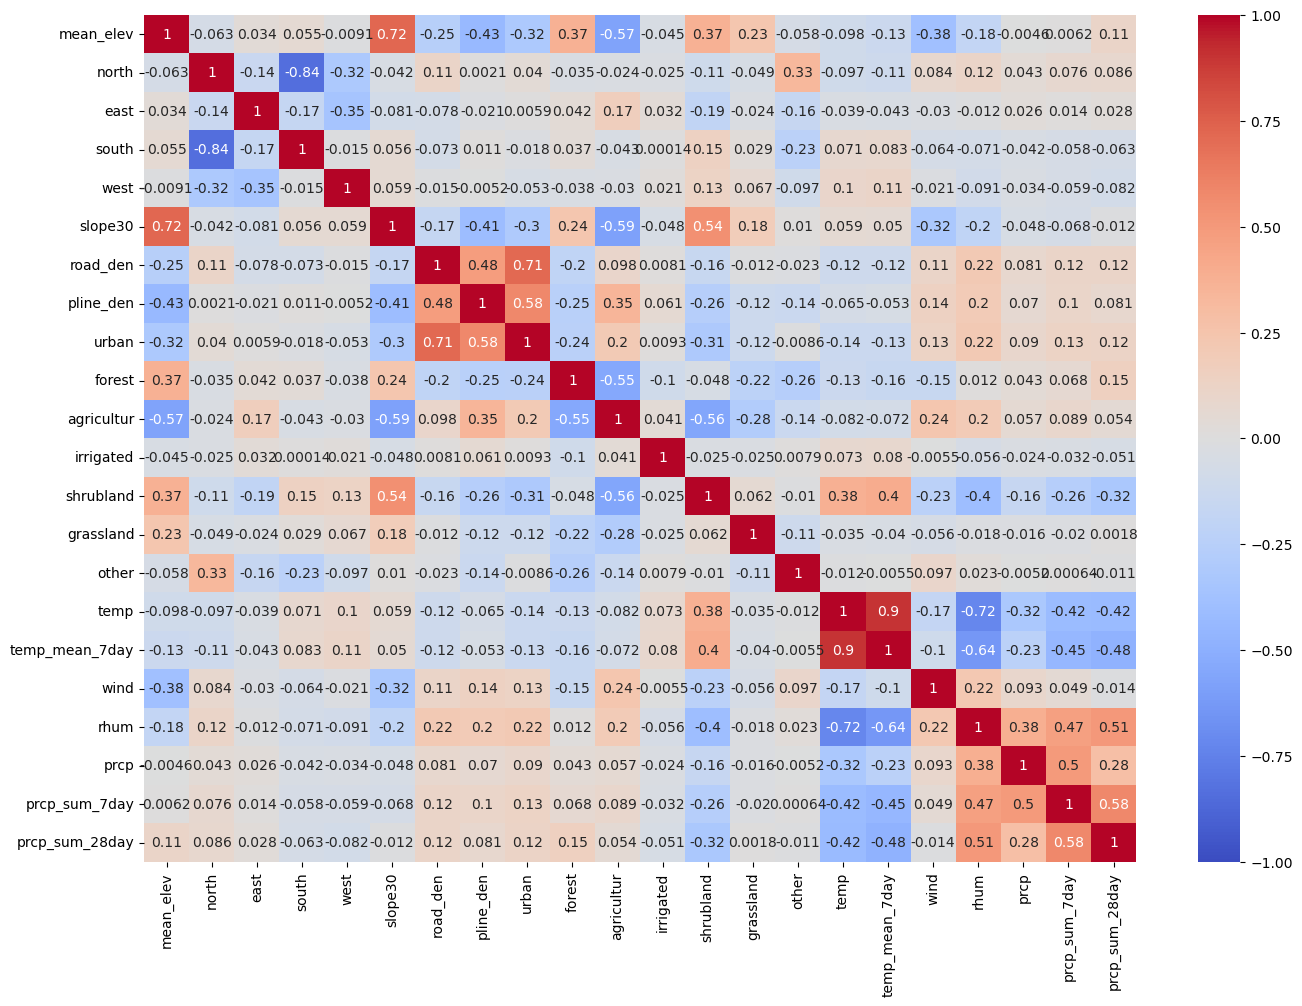

In [22]:
fig, ax = plt.subplots(figsize = (16, 11))
sbn.heatmap(dataset.iloc[:, 2:-4].corr(method =  'pearson', numeric_only = True), cmap="coolwarm", annot=True, ax = ax, vmin = -1, vmax = 1)

#### Remove features which have a correlation greater than 0.8

In [23]:
dataset = dataset.drop(columns = [ 'temp_mean_7day', 'south'])

In [24]:
dataset = dataset.drop(columns = ['date', 'year', 'month', 'lat', 'lon'])

In [25]:
dataset.to_csv(path + '/ml_dataset_' + season_name + '.csv')